Introduction
======
This is likely your first economics course where the primary concern is interpreting facts from data collected in the real world. Central to interpreting data is understanding how data is generated. As economists, we like to think about what economic models, what choices of economic agents generated the data. Thus, we will begin with what you have learned about supply and demand from your previous courses to generate our own simulated dataset. This will serve as a working example we will draw upon as we progress throughout the course. It will be used to demonstrate concepts in statistics and econometrics.

Example: Labor supply and demand
-------------------------------------
You should recall utility and profit maximization for agents and firms. We will consider an example of household labor supply. Let $W^* = g(H, V, U)$ denote the marginal value or shadow price of leisure in the household, where $H$ is number of hours worked $U$ is human capital, and $V$ could include other shifters of the marginal value of leisure, including taste shifters, other prices, asset income, etc. We will refer to $W^*$ as the "asking wage." We will bound $H$ such that $0\leq H \leq 1$.

From the firm side, we obtain the "offered wage" function $W=f(U)$, where $U$ is units of human capital. Equilibrium hours are determined by equating the "asking wage" with the "offered wage": $W^*=W$. We will assume an interior solution so we don't have to worry about corners. What are we assuming with no corners? That at $H=1$, we would essentially have no leisure, so its reasonable to think the marginal value of leisure would be very high at this point, so that we would increase leisure. That at $H=0$, the marginal value of leisure is below the wage. Thus, we can reduce leisure until the MV equals the wage. You will look at what happens when this last assumption is not true in one of your problem sets in one of the most basic examples of selection.

Let us pick particular functional forms for $g(\cdot)$ and $f(\cdot)$:
$$
g(H, V, U)  = a_0 + a_1 H + U + V
$$

$$
f(U)  = b_0 + U
$$

where $a_0$, $a_1$ and $b_0$ are fixed parameters. The equilibrium number of hours worked and wages can be solved as
$$
H  = \frac{b_0-a_0}{a_1} - \frac{V}{a_1}
$$

$$
W  = b_0 + U,
$$
where $U$, $V$ and the parameters are taken as given. If we think of $U$ and $V$ as random variables, then $H$ and $W$ are also random variables. Thus, variation in $U$ and $V$ produce variation in $H$ and $W$. Denote an individual observation as $(H_i, W_i)$. 

- Throughout the course we will often refer to $H$ or $W$ instead of $H_i$ or $W_i$ when observations are iid (independent and identically distributed), but all of these should be considered random variables
- We might also refer to realizations of random variables, denoted as lower case letters, e.g., $h$ as a particular realization of $H$

Let us simulate some data. Let $b_0=1.5$, $a_0=1$ and $a_1=1$ and let the $U_i$ and $V_i$ be uniform $U[-0.5,0.5]$ random variables.

- Bear with me here. I know you might not understand everything here just yet, but the point I want to make is that the data is being generated by an economic model

In [3]:
# Setting random seed (for random number generator)
set.seed(210)

# Parameters for simulation
N = 25
b0 = 1.5
a0 = 1
a1 = 1

# Simulating heterogeneity
U1 = runif(N, min=-0.5, max=0.5)
V1 = runif(N, min=-0.5, max=0.5)

# Computing hours worked and wages
H1 = (b0 - a0)/a1 - V1/a1
W1 = b0 + U1

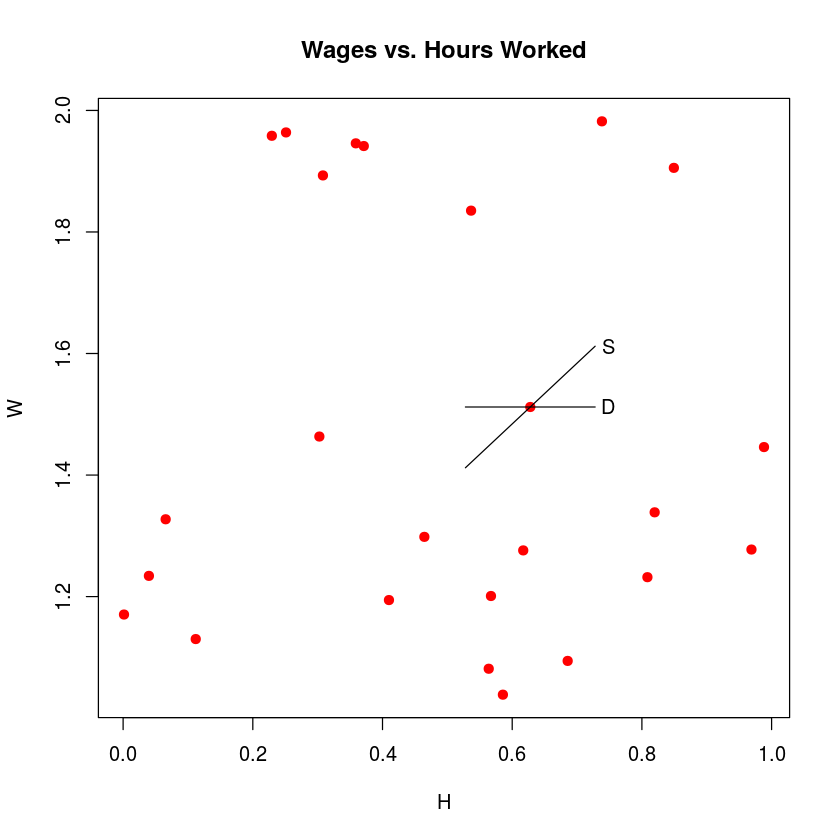

In [16]:
plot(x=H1, y=W1, main="Wages vs. Hours Worked",
    xlab="H", ylab="W", bg="red", col="red", pch=21)

dx = 0.1
l = 1000
lines(y=U1[1] + V1[1] + a0 + a1*seq(-dx + H1[1], dx + H1[1], length.out=l),
     x=seq(-dx + H1[1], dx + H1[1], length.out=l))
lines(y=b0 + rep(U1[1], l),
     x=seq(-dx + H1[1], dx + H1[1], length.out=l))
text(x=dx + 0.02 + H1[1], y=b0 + U1[1], "D")
text(x=dx + 0.02 + H1[1],
    y=U1[1] + V1[1] + a0 + a1*(dx + H1[1]), "S")

The plot above shows data for one particular realization of the world. It is a particular draw from the underlying joint distribution of wages and hours worked. Each data point is at the intersection of a supply and demand curve. Thus, we don't observe points along the demand or supply curve, but rather only the particular equilibria realized in the sample.


To help you understand what it means for $H_i$ and $W_i$ to be random variables, and the vector $(H_i,W_i)_{i=1}^{N}$ to be a random vector, we will draw another sample from the underlying distribution and plot them together. This should hopefully demonstrate the difference between the theoretical mathematical construct we call a random variable and the particular realizations of these random variables.

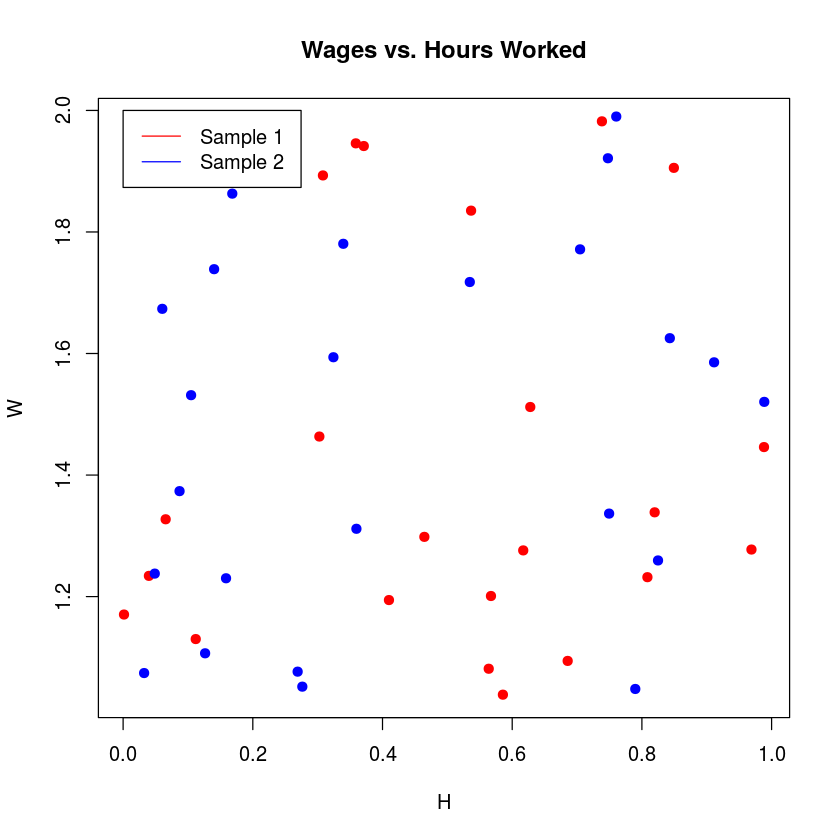

In [38]:
# Simulating heterogeneity
U2 = runif(N, min=-0.5, max=0.5)
V2 = runif(N, min=-0.5, max=0.5)

# Computing hours worked and wages
H2 = (b0 - a0)/a1 - V2/a1
W2 = b0 + U2

plot(x=H1, y=W1, main="Wages vs. Hours Worked",
    xlab="H", ylab="W", bg="red", col="red", pch=21)
lines(x=H2, y=W2, main="Wages vs. Hours Worked",
    xlab="H", ylab="W", bg="blue", col="blue", pch=21,
     type='p')
legend(0, 2, c("Sample 1", "Sample 2"), lty=c(1, 1), 
      col=c("red", "blue"))

The data plotted above are two samples drawn from the same vector of random variables. The idea of a random variable captures the fact that points have a certain probability of being drawn.

But ultimately, what we have to work with as economists is a data table (a single set of such points above) similar to what we see below, for which we show the first 5 observations of the data depicted above. 
- Note that I've not included a measure of human capital $U$. We will assume that we don't have a measure of human capital.

In [33]:
df = data.frame(H=H1, W=W1)
df[1:5,]

H,W
0.6278711,1.512010
0.5365867,1.835127
0.3081297,1.893077
0.9882858,1.446060
0.4645355,1.298304


A Sneak Peak at Econometrics
--------------------------------
And finally, we can introduce what we mean by "econometrics." We essentially just flip the script of our introductory exercise. Instead of taking the model as given and generating data, we want to learn what we can about the underlying process or economic model that generated the data. In other words, how can we leverage our knowledge of economics to interpret the "facts" represented in our data and how can we leverage the "facts" to help us understand the underlying economic model?

So just to foreshadow events to come, let's consider the first sample of data drawn for our hours and wages example. Suppose we want to get the underlying elasticity of supply, or more simply, we want to estimate $a_1$, the slope of our labor supply curve, which we will assume is common across individuals.

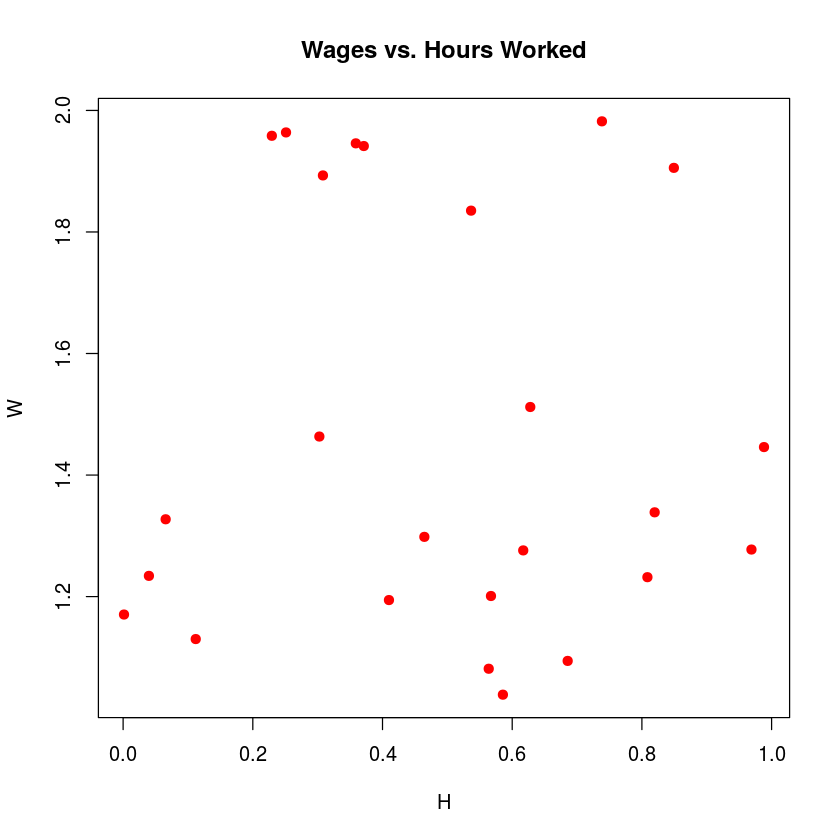

In [37]:
plot(x=H1, y=W1, main="Wages vs. Hours Worked",
    xlab="H", ylab="W", bg="red", col="red", pch=21)

Just by eyeballing it, it appears that there is no linear relationship between wages and hours worked. And indeed, if we plot a line of best fit (more on this later), we essentially get a line with zero slope.

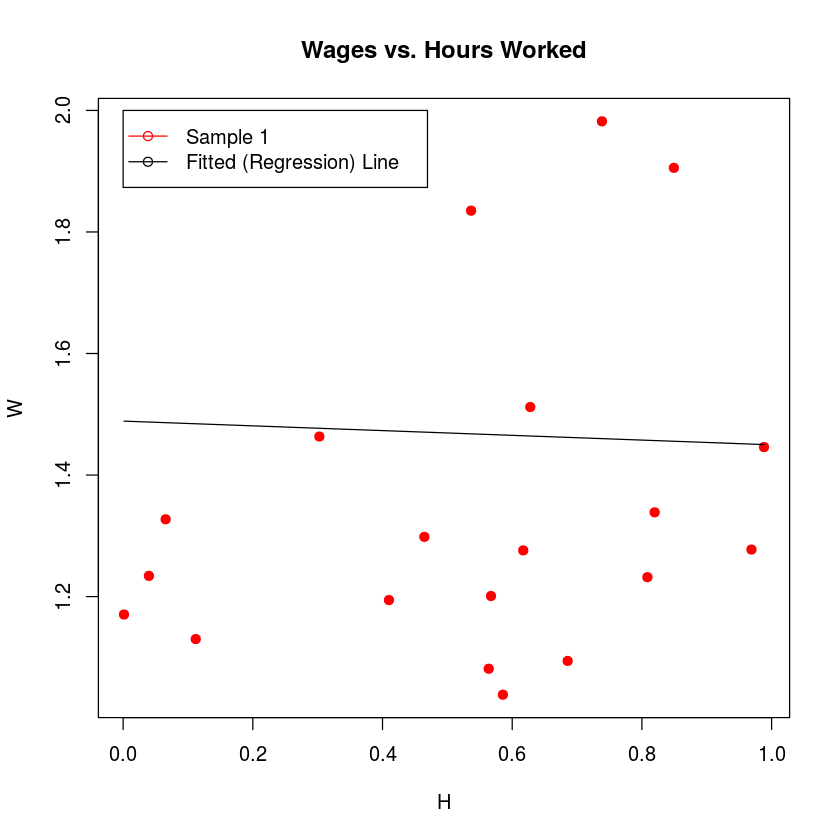

In [45]:
plot(x=H1, y=W1, main="Wages vs. Hours Worked",
    xlab="H", ylab="W", bg="red", col="red", pch=21)

# Fitting regression line
Y = W1
X = cbind(rep(1, N), H1)
params = solve(t(X)%*%X)%*%t(X)%*%Y
lines(x=H1, y=X%*%params)
legend(0, 2, c("Sample 1", "Fitted (Regression) Line"), pch=c(1, 1), 
      col=c("red", "black"), lty=c(1,1))